In [1]:
import pandas as pd
import seaborn as sns

In [2]:
telcom = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
#  查看数据集内容
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#  查看数据集大小
telcom.shape

(7043, 21)

In [4]:
#  查看数据集描述统计信息
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#  查看数据集类型
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#  TotalCharges表示总费用，这里为对象类型，需要转换为float类型
telcom['TotalCharges'] = telcom['TotalCharges'].convert_objects(convert_numeric=True)
telcom['TotalCharges'].dtypes

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


dtype('float64')

In [7]:
#  查找缺失值
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#  删除缺失值所在行
telcom.dropna(inplace=True)
telcom.shape

(7032, 21)

In [9]:
#  数据归一化处理
#  对Churn列中的值Yes和No分别用1和0替换，方便后续处理
telcom['Churn'].replace('Yes',1,inplace=True)
telcom['Churn'].replace('No',0,inplace=True)
telcom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [10]:
#  数据集中有5174名用户没流失，有1869名客户流失，数据集不均衡。
churn = telcom['Churn'].value_counts()
labels = telcom['Churn'].value_counts().index
print(churn)
print(labels)

0    5163
1    1869
Name: Churn, dtype: int64
Int64Index([0, 1], dtype='int64')


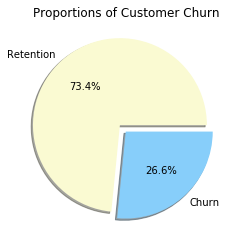

In [12]:
#  查看流失客户占比，画饼状图显示
import matplotlib.pyplot as plt
plt.pie(churn,labels=['Retention','Churn'],colors=['lightgoldenrodyellow','lightskyblue'],explode=(0.1,0),autopct='%1.1f%%',shadow=True)
plt.title('Proportions of Customer Churn')
plt.show()
#  由图中结果可以看出，流失客户占整体客户的26.6%。

Text(0.5, 1.0, 'Churn by Dependents')

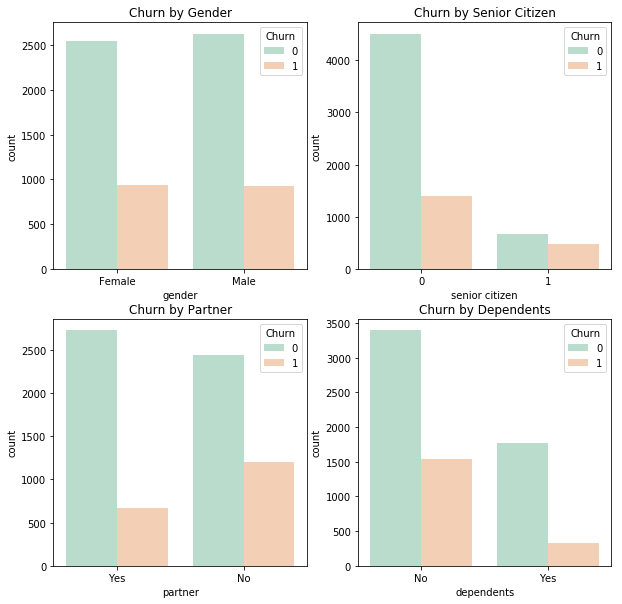

In [13]:
#  进一步分析性别、老年人、配偶、亲属对流客户流失率的影响
import seaborn as sns
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

plt.subplot(2,2,1)
gender=sns.countplot(x="gender",hue="Churn",data=telcom,palette="Pastel2") # palette参数表示设置颜色，这里设置为主题色Pastel2
plt.xlabel("gender")
plt.title("Churn by Gender")

plt.subplot(2,2,2)
seniorcitizen=sns.countplot(x="SeniorCitizen",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("senior citizen")
plt.title("Churn by Senior Citizen")

plt.subplot(2,2,3)
partner=sns.countplot(x="Partner",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("partner")
plt.title("Churn by Partner")

plt.subplot(2,2,4)
dependents=sns.countplot(x="Dependents",hue="Churn",data=telcom,palette="Pastel2")
plt.xlabel("dependents")
plt.title("Churn by Dependents")


可以看出，男性与女性用户之间的流失情况基本没有差异，而在老年用户中流失占比明显比非老年用户更高，在所有数据中未婚与已婚人数基本持平，但未婚中流失人数比已婚中的流失人数高出了快一倍，从经济独立情况来看，经济未独立的用户流失率要远远高于经济独立的用户。

In [14]:
#  提取表中前面20个因子，’Churn’为目标
charges=telcom.iloc[:,1:20]
#  对特征进行编码
"""
离散特征的编码分为两种情况：
1、离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码
2、离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}
"""
corrDf = charges.apply(lambda x:pd.factorize(x)[0])
corrDf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4


In [15]:
#  构造相关性矩阵
corr = corrDf.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,0.001379,0.010349,-0.000265,-0.007515,-0.010284,-0.002236,-0.004365,0.011081,0.004526,0.000057,0.000578,-0.001339,0.000095,0.011902,-0.004928,-0.008017,-0.012153
SeniorCitizen,-0.001819,1.000000,-0.016957,-0.210550,0.012240,0.008392,0.113769,-0.032160,-0.210546,-0.144762,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,-0.156258,-0.093712,0.049154,0.022949
Partner,0.001379,-0.016957,1.000000,-0.452269,-0.100513,-0.018397,-0.118037,-0.000513,-0.081078,0.091536,-0.093391,-0.068277,-0.079066,-0.075310,-0.294094,-0.013957,-0.133280,-0.036518,-0.044214
Dependents,0.010349,-0.210550,-0.452269,1.000000,0.044138,-0.001078,-0.019178,0.044030,0.188889,0.061970,0.154819,0.179176,0.138809,0.125086,0.240556,0.110131,0.124002,-0.028706,0.009710
tenure,-0.000265,0.012240,-0.100513,0.044138,1.000000,-0.017864,0.064580,-0.012924,0.014436,-0.066232,0.034744,0.030489,0.024719,0.030252,0.118664,-0.013160,0.075533,0.042605,0.112813
PhoneService,-0.007515,0.008392,-0.018397,-0.001078,-0.017864,1.000000,0.674824,0.387266,0.125544,0.129432,0.138938,0.123533,0.171773,0.164379,0.003019,-0.016696,-0.003106,-0.141696,-0.030534
MultipleLines,-0.010284,0.113769,-0.118037,-0.019178,0.064580,0.674824,1.000000,0.186852,-0.066695,-0.130978,-0.012819,-0.066814,0.030524,0.027944,0.084037,-0.133538,0.026248,0.024221,0.014915
InternetService,-0.002236,-0.032160,-0.000513,0.044030,-0.012924,0.387266,0.186852,1.000000,0.607412,0.650084,0.662685,0.609422,0.712715,0.708336,0.099579,0.138166,0.008851,-0.288948,-0.037709
OnlineSecurity,-0.004365,-0.210546,-0.081078,0.188889,0.014436,0.125544,-0.066695,0.607412,1.000000,0.621270,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.214330,-0.219289,-0.024821
OnlineBackup,0.011081,-0.144762,0.091536,0.061970,-0.066232,0.129432,-0.130978,0.650084,0.621270,1.000000,0.600952,0.616520,0.603551,0.606037,0.034745,0.260691,0.003786,-0.283212,-0.053770


Text(0.5, 1.0, 'Correlation between variables')

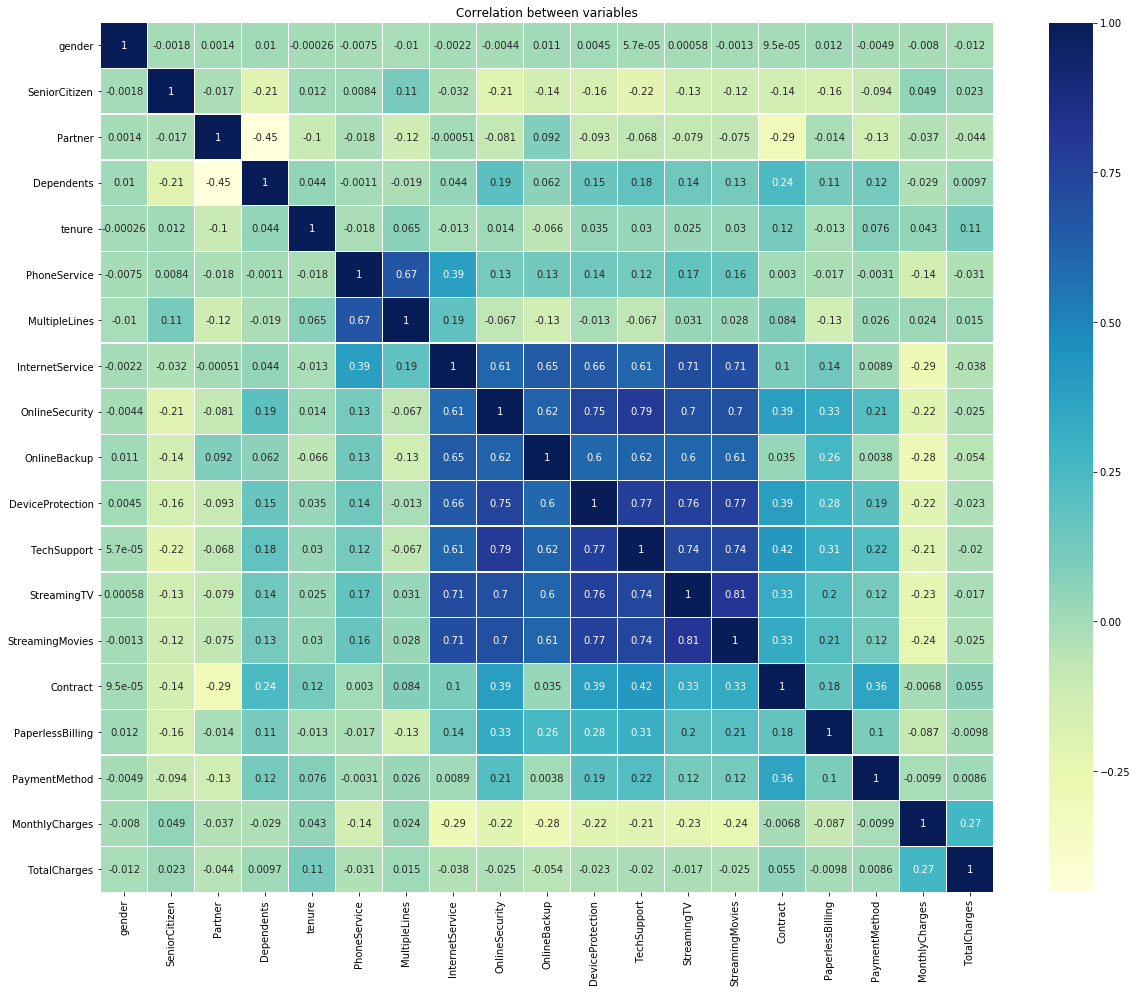

In [16]:
#  使用热地图显示相关系数
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.3,cmap='YlGnBu',annot=True)
plt.title("Correlation between variables")

从上图可以看出，互联网服务、网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视和网络电影之间存在较强的相关性，多线业务和电话服务之间也有很强的相关性，并且都呈强正相关关系。

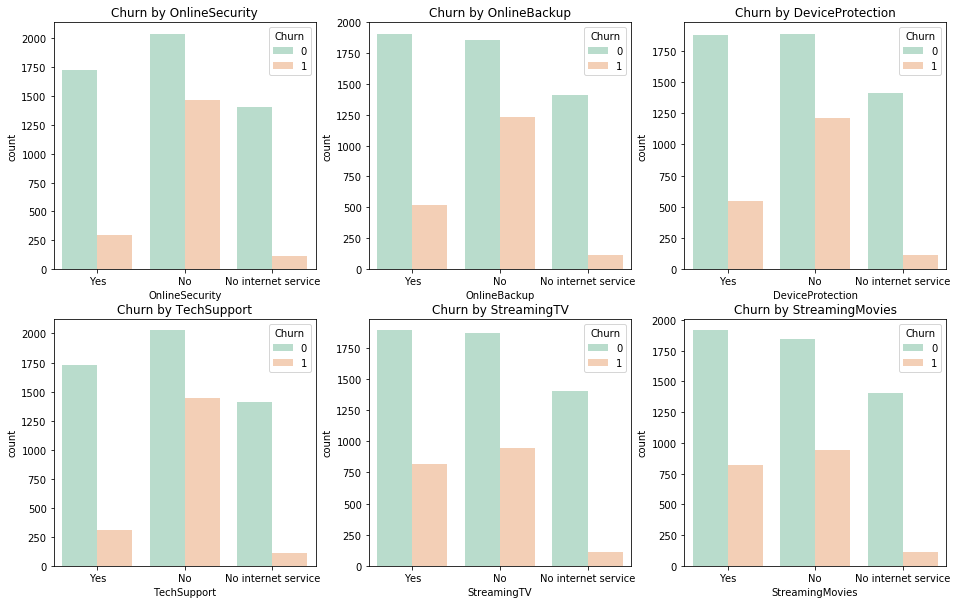

In [17]:
#  深入查看网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视、网络电影和无互联网服务对客户流失率的影响
covariables=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,10))
for i,item in enumerate(covariables):
    plt.subplot(2,3,(i+1))
    ax = sns.countplot(x=item,hue='Churn',data=telcom,palette='Pastel2',order=['Yes','No','No internet service'])
    plt.xlabel(str(item))
    plt.title('Churn by ' + item)
    i = i+1
plt.show()

由上图可以看出，在网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视和网络电影六个变量中，没有互联网服务的客户流失率值是相同的，都是相对较低。
这可能是因为以上六个因素只有在客户使用互联网服务时才会影响客户的决策，这六个因素不会对不使用互联网服务的客户决定是否流失产生推论效应。

In [18]:
#  使用one-hot编码
tel_dummies = pd.get_dummies(telcom.iloc[:,1:21])
tel_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Text(0.5, 1.0, 'Correlations between Churn and variables')

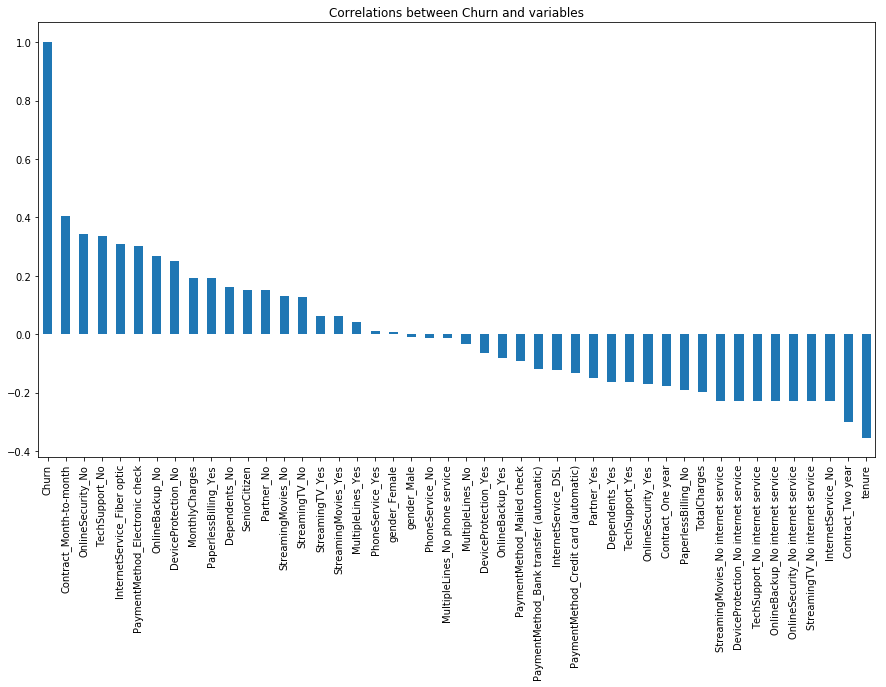

In [19]:
#  电信用户是否流失与各变量之间的相关性
plt.figure(figsize=(15,8))
tel_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlations between Churn and variables")

由图上可以看出，变量gender 和 PhoneService 处于图形中间，其值接近于 0 ，这两个变量对电信客户流失预测影响非常小，可以直接舍弃。

Text(0.5, 1.0, 'Churn by Contract type')

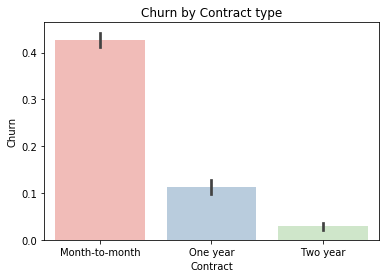

In [20]:
#  签订合同方式对客户流失率的影响
sns.barplot(x='Contract',y='Churn',data=telcom,palette='Pastel1',order=['Month-to-month','One year','Two year'])
plt.title('Churn by Contract type')

由图上可以看出，签订合同方式对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，这可能表明，设定长期合同对留住现有客户更有效。

Text(0.5, 1.0, 'Churn by PaymentMethod type')

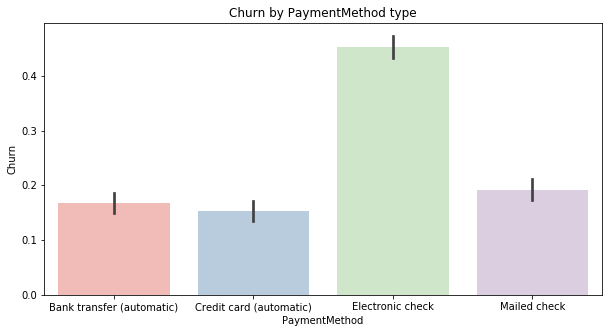

In [21]:
#  付款方式对客户流失率的影响
plt.figure(figsize=(10,5))
sns.barplot(x='PaymentMethod',y='Churn',data=telcom,palette='Pastel1',order=['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check'])
plt.title('Churn by PaymentMethod type')

由图上可以看出，在四种支付方式中，使用Electronic check的用户流流失率最高，其他三种支付方式基本持平，因此可以推断电子账单在设计上影响用户体验。

由前面结果可知，CustomerID表示每个客户的随机字符，对后续建模不影响，我这里选择删除CustomerID列；gender 和 PhoneService 与流失率的相关性低，也直接忽略删除。

In [30]:
telcomvar = telcom.drop(['customerID','gender','PhoneService','Churn'],axis=1)
telcomvar.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [33]:
telcomvar.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [32]:
#  对客户的职位、月费用和总费用进行去均值和方差缩放，对数据进行Z-Score标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
#  sk-learn提供两种标准化方式
#  先拟合数据再将数值缩小到（0，1）之间
scaler.fit_transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

d:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [35]:
telcomvar[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Check outliers of standardized tenure,MonthlyCharges and TotalCharges')

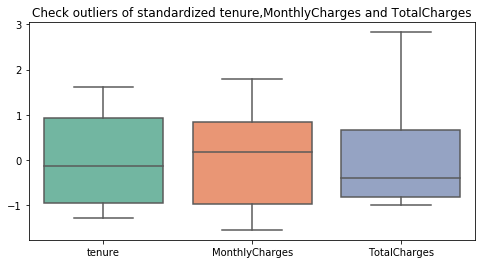

In [36]:
#  使用箱线图查看数据是否存在异常值
plt.figure(figsize=(8,4))
numbox = sns.boxplot(data=telcomvar[['tenure','MonthlyCharges','TotalCharges']],palette='Set2')
plt.title("Check outliers of standardized tenure,MonthlyCharges and TotalCharges")

由以上结果可以看出，在三个变量中不存在明显的异常值

In [40]:
#  查看对象类型字段中存在的值
def uni(columnlabel):
    print(columnlabel,"--",telcomvar[columnlabel].unique())
#  根据数据类型'object'选取子数据 
telcomobject = telcomvar.select_dtypes(['object'])
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


综合之前的结果来看，在六个变量中存在No internet service，即无互联网服务对客户流失率影响很小，这些客户不使用任何互联网产品，因此可以将No internet service 和 No 是一样的效果，可以使用 No 替代 No internet service。

In [41]:
telcomvar.replace('No phone service','No',inplace=True)
telcomvar.replace('No internet service','No',inplace=True)
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
MultipleLines -- ['No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes']
OnlineBackup -- ['Yes' 'No']
DeviceProtection -- ['No' 'Yes']
TechSupport -- ['No' 'Yes']
StreamingTV -- ['No' 'Yes']
StreamingMovies -- ['No' 'Yes']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [42]:
#  使用Scikit-learn标签编码,将分类数据转换为整数编码
from sklearn.preprocessing import LabelEncoder
def labelencode(columnlabel):
    telcomvar[columnlabel] = LabelEncoder().fit_transform(telcomvar[columnlabel])
for i in range(0,len(telcomobject.columns)):
    labelencode(telcomobject.columns[i])
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])    

Partner -- [1 0]
Dependents -- [0 1]
MultipleLines -- [0 1]
InternetService -- [0 1 2]
OnlineSecurity -- [0 1]
OnlineBackup -- [1 0]
DeviceProtection -- [0 1]
TechSupport -- [0 1]
StreamingTV -- [0 1]
StreamingMovies -- [0 1]
Contract -- [0 1 2]
PaperlessBilling -- [1 0]
PaymentMethod -- [2 3 0 1]


In [44]:
#  建立训练数据集和测试数据集
from sklearn.model_selection import StratifiedShuffleSplit
X=telcomvar
y=telcom["Churn"].values

sss=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(sss)
print("训练数据和测试数据被分成的组数：",sss.get_n_splits(X,y))


StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
训练数据和测试数据被分成的组数： 5


In [45]:
# 建立训练数据和测试数据
for train_index, test_index in sss.split(X, y):
    print("train:", train_index, "test:", test_index)
    X_train,X_test=X.iloc[train_index], X.iloc[test_index]
    y_train,y_test=y[train_index], y[test_index]

train: [3780 1588 2927 ... 3956 6130 6814] test: [5126 2423 2498 ... 6703 6618 6010]
train: [6916 6953 5388 ... 6156 3262 3471] test: [4097 4734 2309 ... 1278 1724 5508]
train: [1218 2877 3756 ...  848 4568 6967] test: [ 133 1822 5303 ... 3150 5611 4569]
train: [2552 4723 2055 ... 4030 2165 1994] test: [ 233  438 4434 ... 4625 1121 3422]
train: [4040 1561 6463 ... 2550 6727 4009] test: [4581 3898 3153 ... 2095 1765 2249]


In [46]:
# 输出数据集大小
print('原始数据特征：', X.shape,
      '训练数据特征：',X_train.shape,
      '测试数据特征：',X_test.shape)

print('原始数据标签：', y.shape,
      '   训练数据标签：',y_train.shape,
      '   测试数据标签：',y_test.shape)

原始数据特征： (7032, 17) 训练数据特征： (5625, 17) 测试数据特征： (1407, 17)
原始数据标签： (7032,)    训练数据标签： (5625,)    测试数据标签： (1407,)


In [49]:
#  选择机器学习算法
#  使用分类算法，这里选用10种分类算法
from sklearn.ensemble import RandomForestClassifier          # 随机森林
from sklearn.svm import SVC, LinearSVC                       # 支持向量机
from sklearn.linear_model import LogisticRegression          # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier           # KNN算法
from sklearn.naive_bayes import GaussianNB                   # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier              # 决策树分类器
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Classifiers=[["Random Forest",RandomForestClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["KNN",KNeighborsClassifier(n_neighbors=5)],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
             ["GradientBoostingClassifier", GradientBoostingClassifier()],
             #["XGB", XGBClassifier()],
             #["CatBoost", CatBoostClassifier(logging_level='Silent')]  
]

In [52]:
#  训练模型
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier=classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    class_eva=pd.DataFrame([recall,precision])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

d:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
#  评估模型
"""
召回率（recall）的含义是：原本为对的当中，预测为对的比例（值越大越好，1为理想状态）
精确率、精度（precision）的含义是：预测为对的当中，原本为对的比例（值越大越好，1为理想状态）
F1分数（F1-Score）指标综合了Precision与Recall的产出的结果
F1-Score的取值范围从0到1的，1代表模型的输出最好，0代表模型的输出结果最差。
"""
names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=["recall","precision","f1score"]
result


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements